In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')  # Change the style name to a valid style
sns.set(font_scale=1.0)

import missingno as msno

# ignore warings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('/Users/kenny_jung/aiffel/data/titanic_train.csv')
df_test = pd.read_csv('/Users/kenny_jung/aiffel/data/titanic_test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
df_train[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [11]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

In [12]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

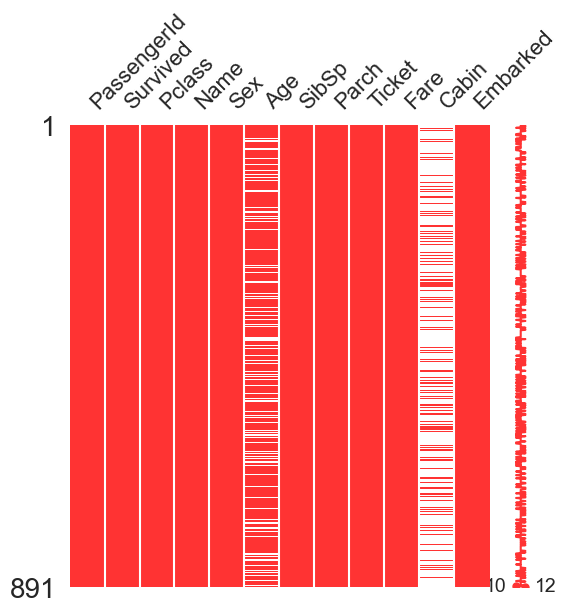

In [13]:
msno.matrix(df=df_train.iloc[:, :], figsize=(6, 6), color=(1, 0.2, 0.2))

<Axes: >

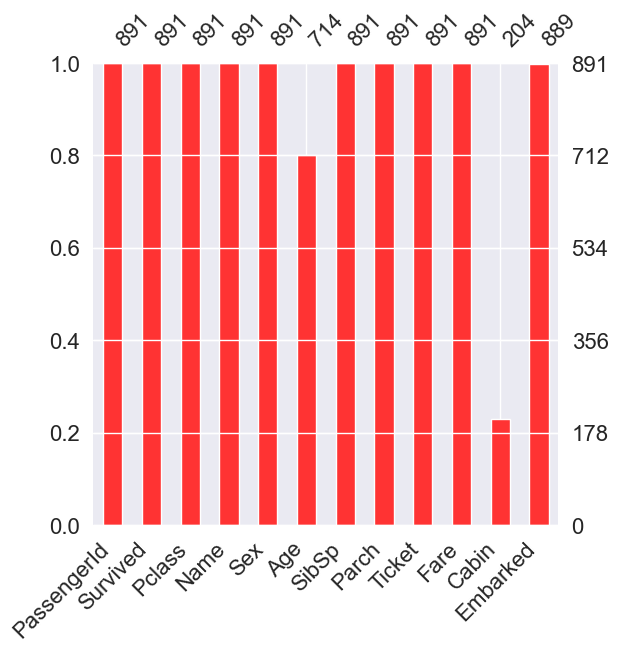

In [14]:
msno.bar(df=df_train.iloc[:, :], figsize=(6, 6), color=(1, 0.2, 0.2))

In [15]:
df_train.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. EDA

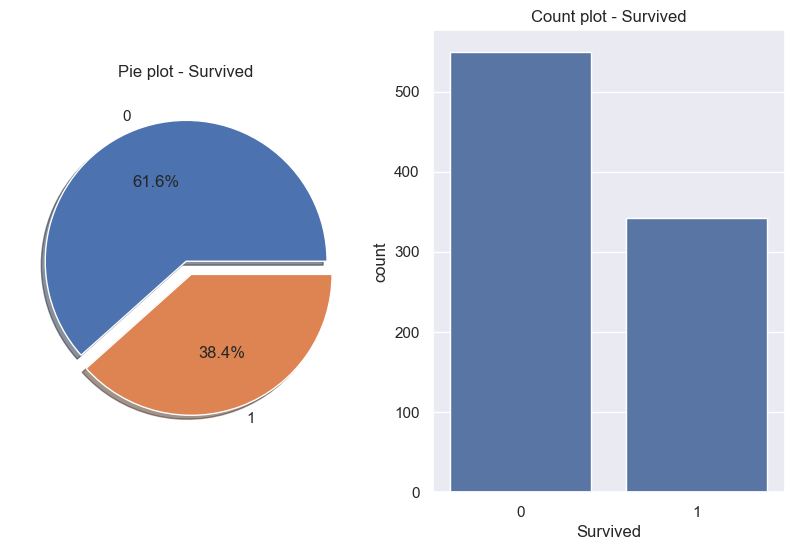

In [16]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])  # x 또는 y 중 하나를 선택
ax[1].set_title('Count plot - Survived')

plt.show()

In [17]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

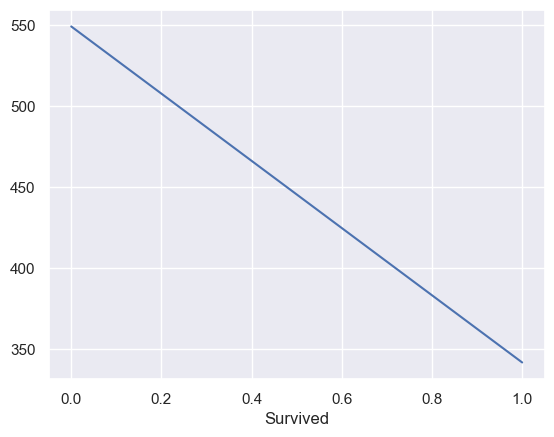

In [18]:
df_train['Survived'].value_counts().plot()

<Axes: ylabel='count'>

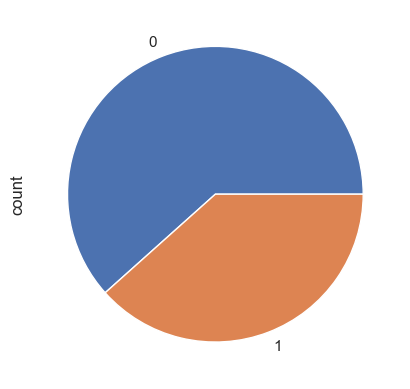

In [19]:
df_train['Survived'].value_counts().plot.pie()

In [20]:
df_train.shape # finding feature count

(891, 12)

## 2.1 Pclass

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df_train[['Pclass', 'Survived']]. groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
df_train[['Pclass', 'Survived']]. groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
%pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean() # Survived Ratio

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

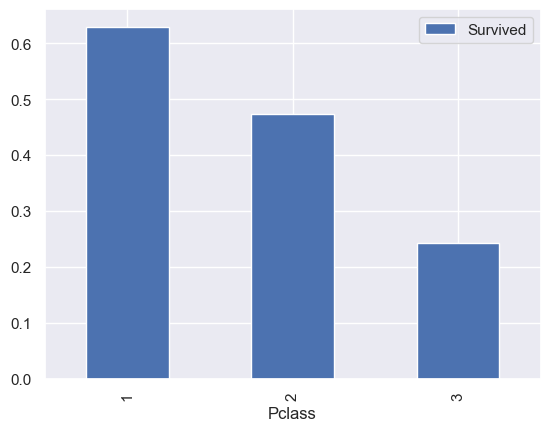

In [28]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [29]:
# y_position = 1.02
# f, ax = plt.subplots(1, 2, figsize=(10, 6))
# df_train['Pclass'].value_counts().plt.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
# ax[0].set_title('Number of Passengers By Pclass', y=y_position)
# ax[0].set_ylabel('Count')

# sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
# ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

# plt.show()

## 3. EDA - Sex(성별)

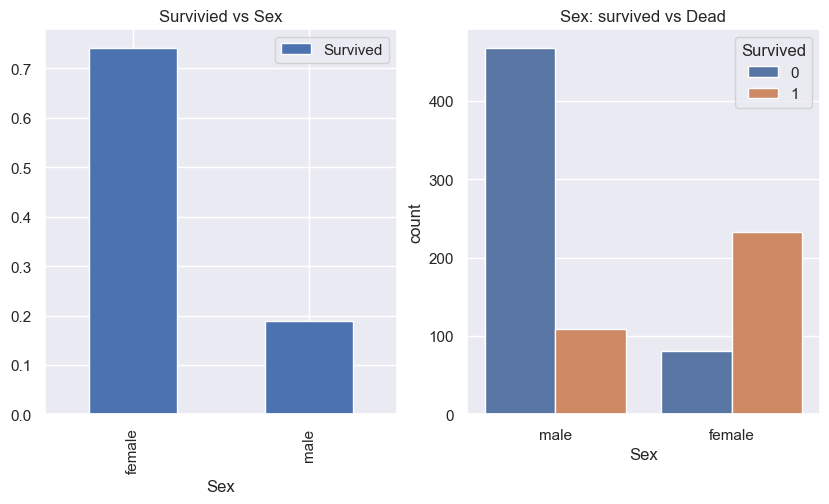

In [30]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivied vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: survived vs Dead')

plt.show()

In [31]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()*100 # Survival Ratio by Sex

,Survived
Sex,
female,74.203822
male,18.890815


<Axes: xlabel='Sex'>

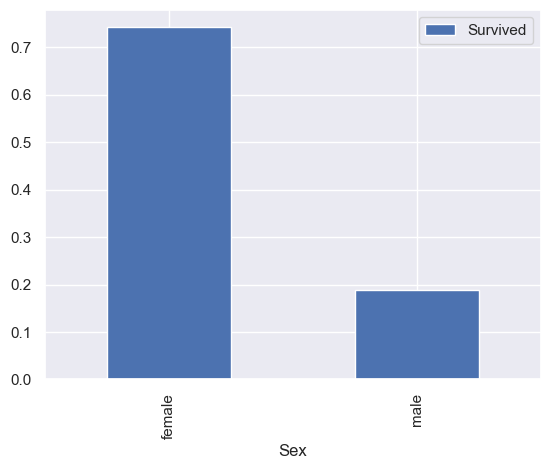

In [32]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

In [33]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [34]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [35]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Text(0.5, 1.0, 'Factor Plot - Pclass vs Survived by Sex')

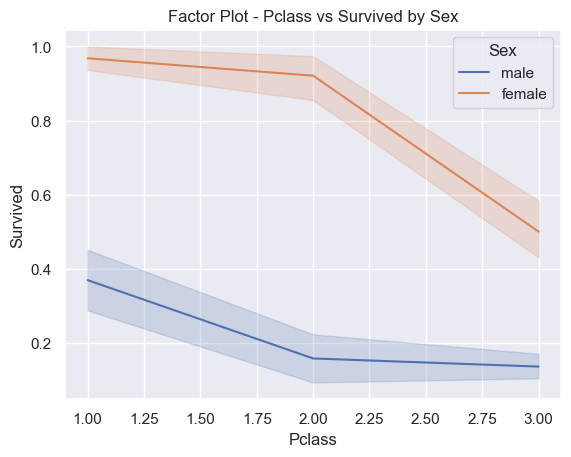

In [36]:
# sns.catplot('Pclass', 'Survivied', hue='Sex', data=df_train, size=6, aspect=1.5)
# sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5)
# sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, height=6, aspect=1.5, kind='line')
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
plt.title('Factor Plot - Pclass vs Survived by Sex')

sns.f

<Axes: xlabel='Sex', ylabel='Survived'>

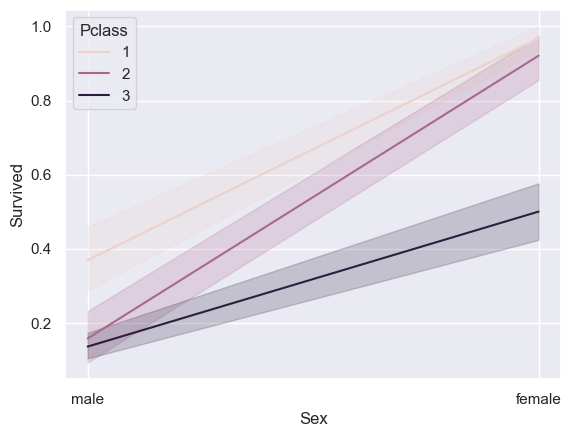

In [37]:
sns.lineplot(x='Sex', y='Survived', hue='Pclass', data=df_train)

## Age

In [38]:
print('제일 나이 많은 탐승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탐승객: {:.1f} years'.format(df_train['Age'].min()))
print('탐승객 평균 나이: {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탐승객: 80.0 years
제일 어린 탐승객: 0.4 years
탐승객 평균 나이: 29.7 years


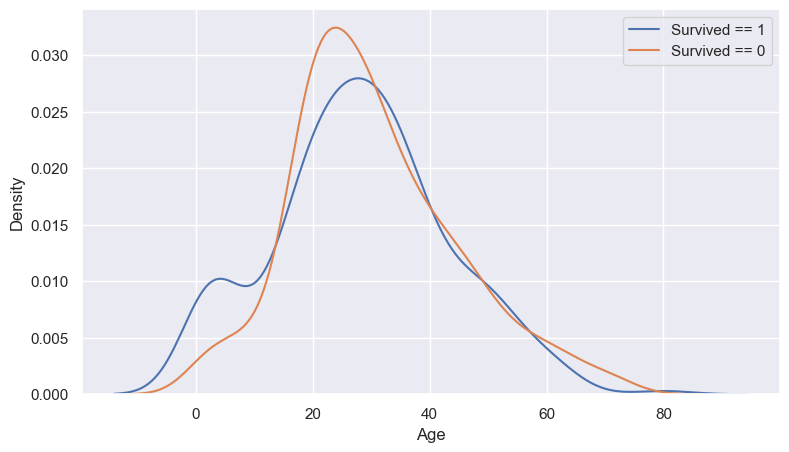

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: >

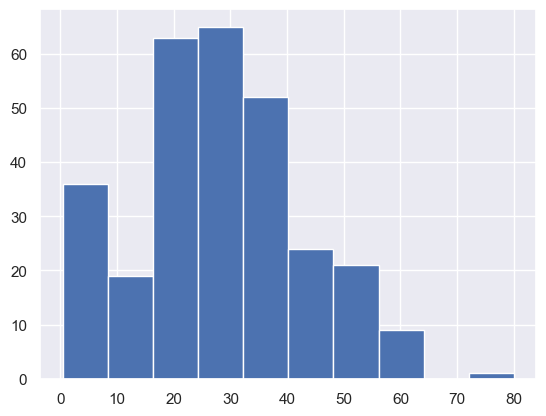

In [40]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [41]:
df_train.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [42]:
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [43]:
df_train[df_train['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


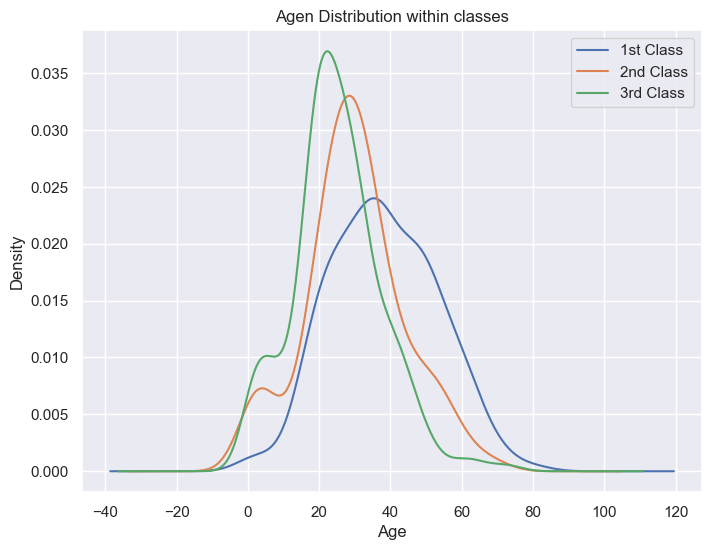

In [44]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Agen Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

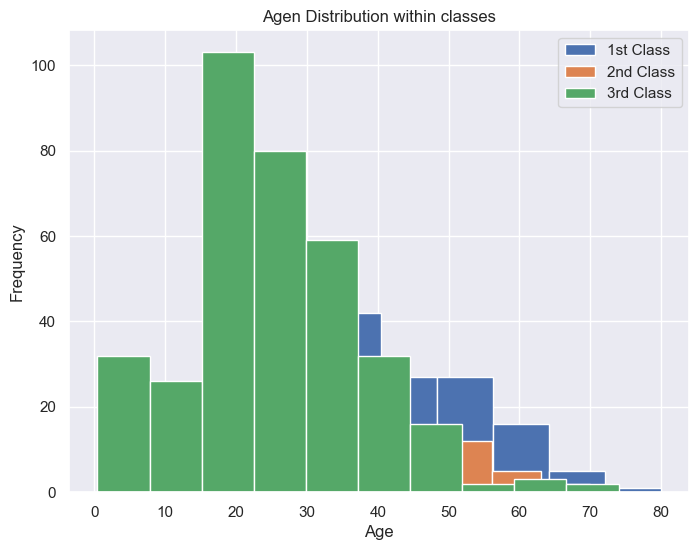

In [45]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist')

plt.xlabel('Age')
plt.title('Agen Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

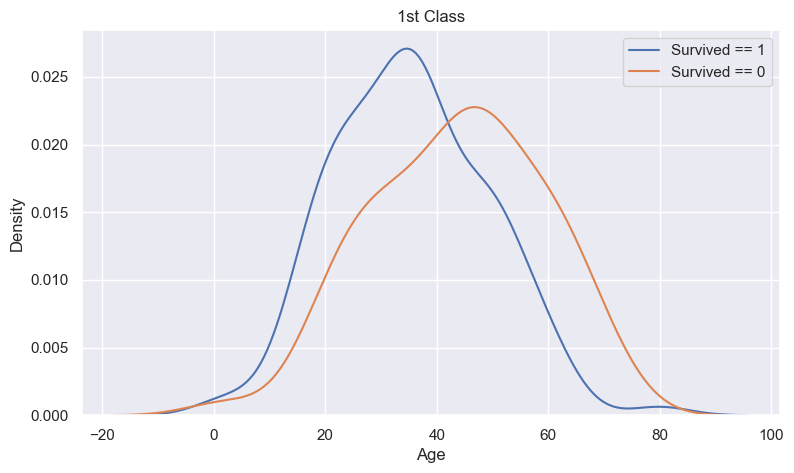

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Class')
plt.show()

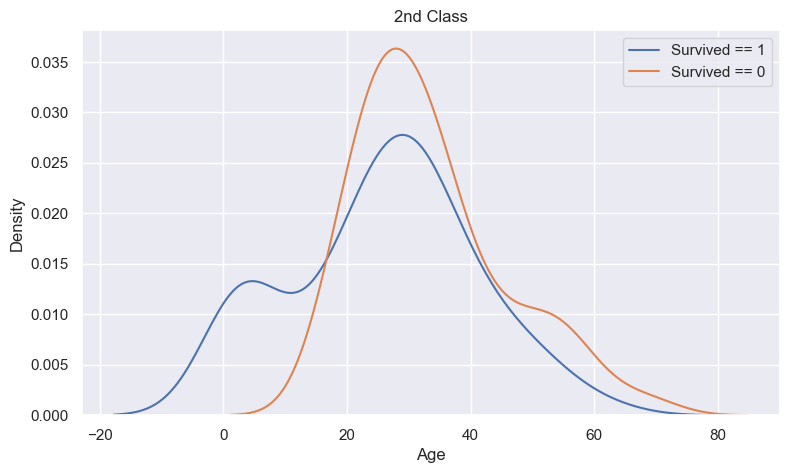

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd Class')
plt.show()

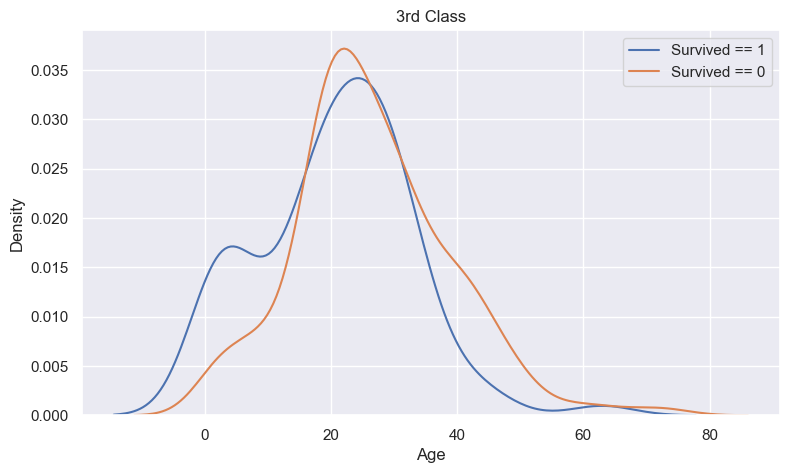

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd Class')
plt.show()

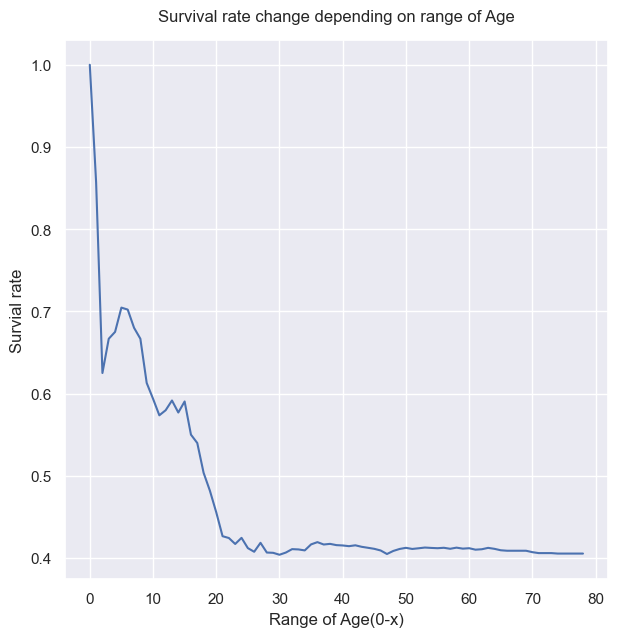

In [49]:
change_age_survival_ratio = []
for i in range(1, 80):
    change_age_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survial rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

In [50]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

In [51]:
df_train[df_train['Age'] < i]['Survived'].sum()

38

In [52]:
len(df_train[df_train['Age'] < i]['Survived'])

62

## Pclass, Sex, Age

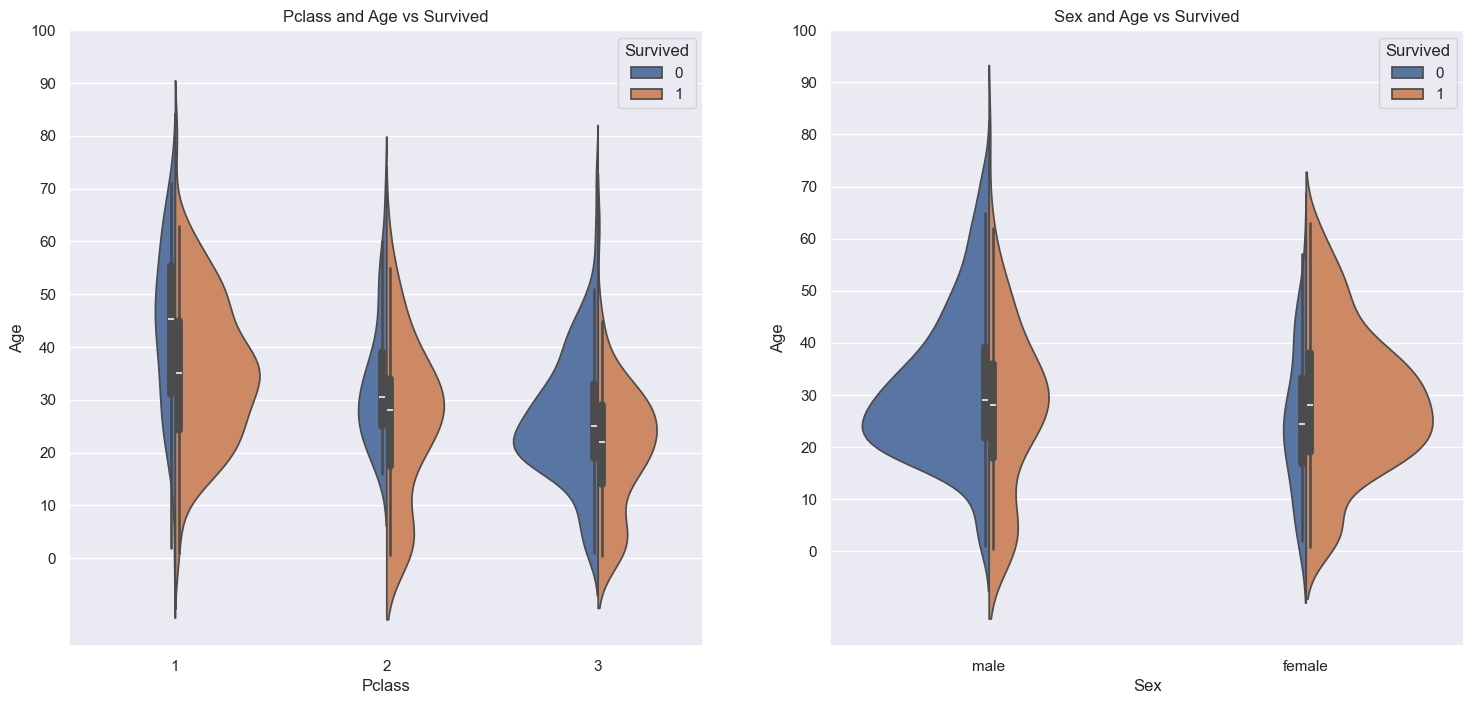

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

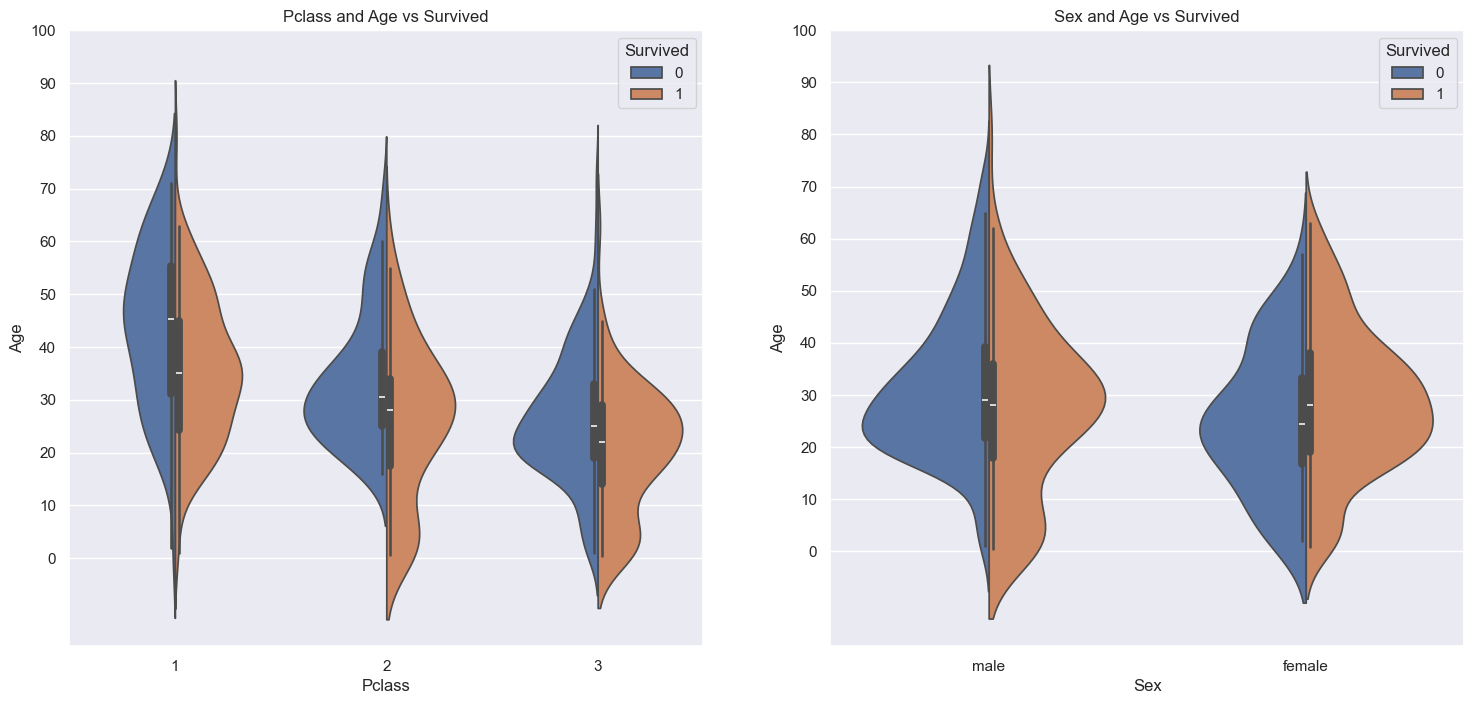

In [54]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='area', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='area', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## Embarked

<Axes: xlabel='Embarked'>

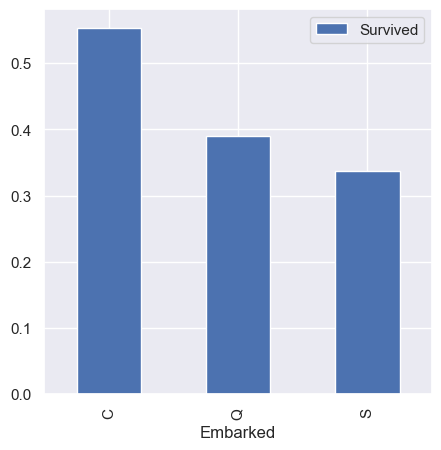

In [55]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [56]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


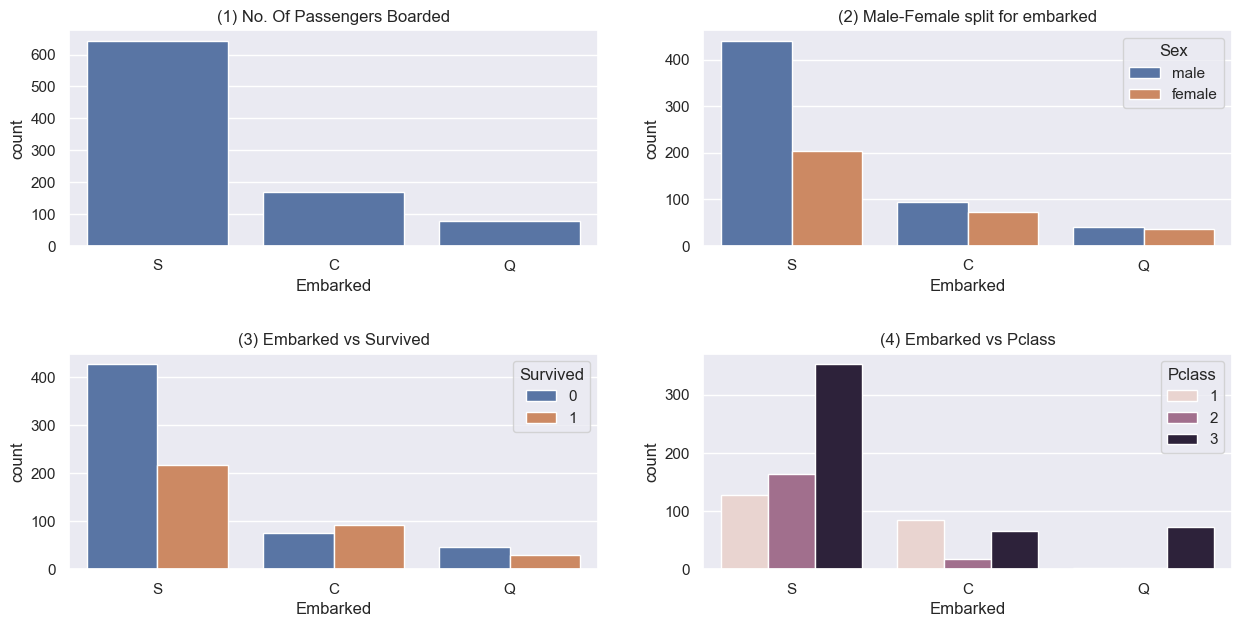

In [57]:
f, ax = plt.subplots(2, 2, figsize=(15,7))

sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Family - SibSp + Parch

In [58]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1

In [59]:
print('Maximum size of Family:', df_train['FamilySize'].max())
print('Minimum size of Family:', df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


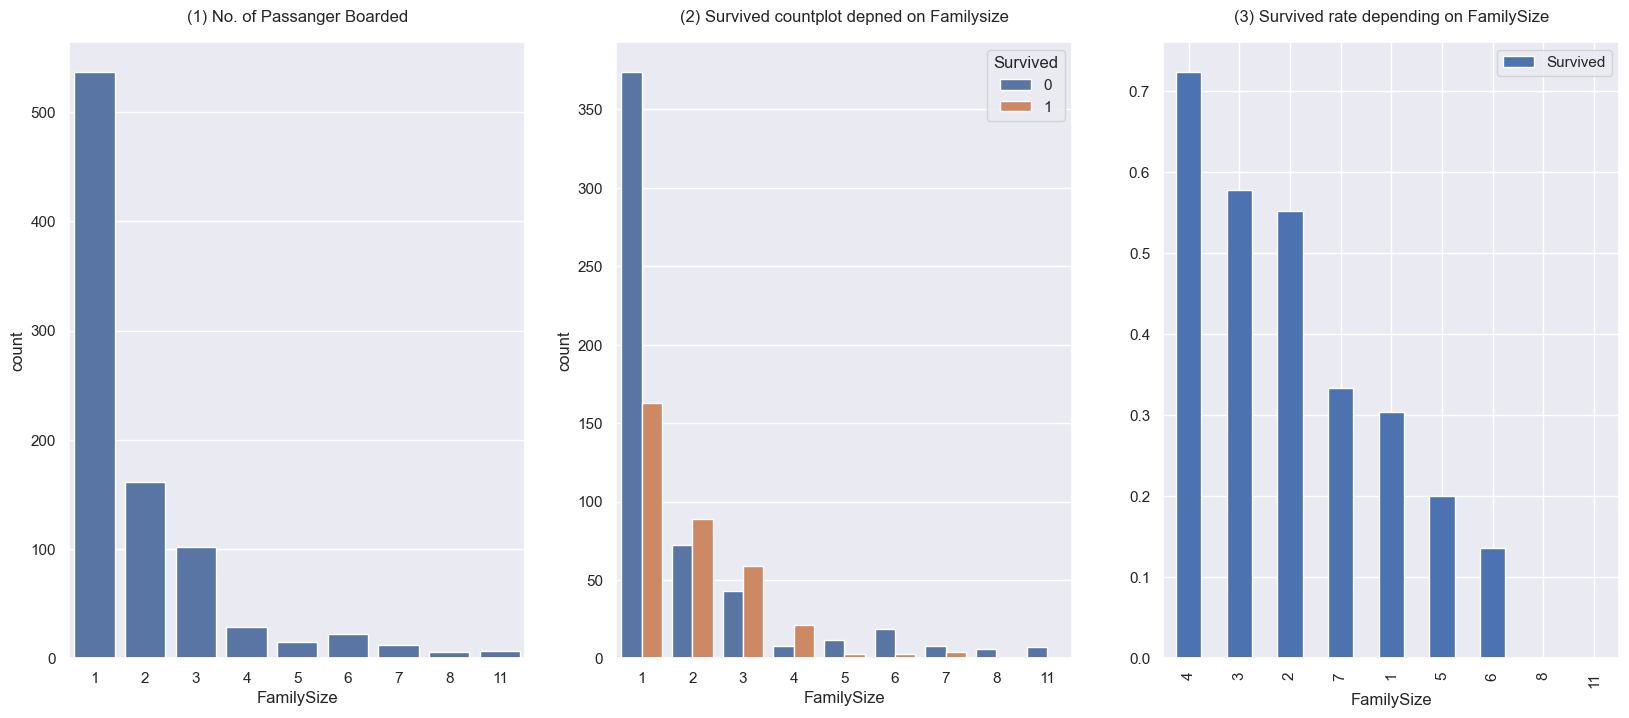

In [60]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passanger Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depned on Familysize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [61]:
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


## Fare

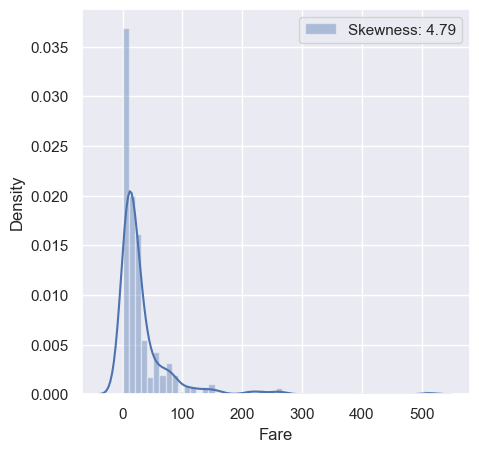

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [63]:
df_train['Fare'] = df_train['Fare'].map(lambda i:np.log(i) if i>0 else 0) # Feature Engineering for improve model performance

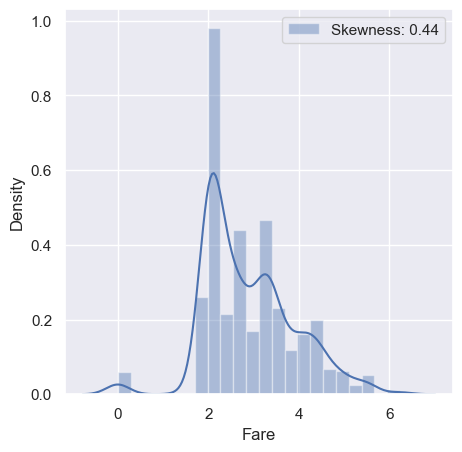

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## Ticket

In [65]:
df_train['Ticket'].value_counts() 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

# Feature Engineering

In [66]:
df_train['Age'].isnull().sum()

177

In [67]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [68]:
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [69]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [70]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [71]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [72]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [73]:
pd.crosstab(df_test['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,0,1,6,26,95,31,1,0
male,2,1,0,15,52,145,41,0,2


In [74]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [75]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [76]:
pd.crosstab(df_test['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,6,27,96,31,0
male,15,52,146,41,4


In [77]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr


In [78]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [79]:
df_train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

<Axes: xlabel='Initial'>

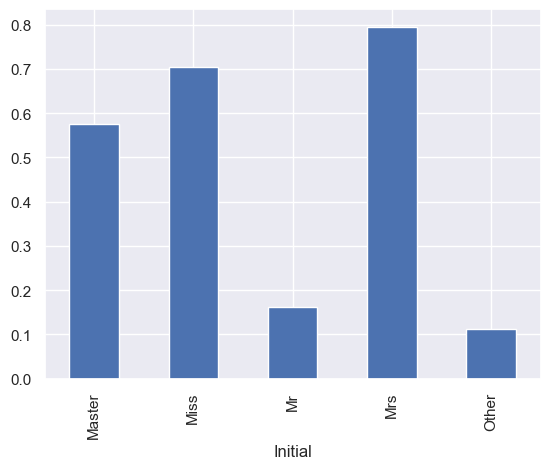

In [80]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [81]:
df_all = pd.concat([df_train, df_test])

In [82]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,Mr
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,Mr


In [83]:
df_all.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0,Mr
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0,Mrs
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0,Miss
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0,Mrs
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,Mr
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,Mr
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,Mr
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,Mr


In [84]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,Mr


In [85]:
df_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,13.329476,1.904602
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,35.048637,1.613459
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,2.251292,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,3.396172,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,7.854200,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,11.000000


In [86]:
# df_all.groupby('Initial').mean()

In [87]:
df_all.groupby('Initial').mean('Age')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.675000
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.236559
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.444234
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.511811
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.222222


In [88]:
df_train.loc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr


In [89]:
df_train.loc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                          1.981001
Cabin                              NaN
Embarked                             S
FamilySize                           2
Initial                             Mr
Name: 0, dtype: object

In [90]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [91]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,3.391147,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr


In [92]:
df_train[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')] # loc 없이도 가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,3.391147,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr


In [93]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] 

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [94]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33

In [95]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] 

Series([], Name: Age, dtype: float64)

In [96]:
df_all.groupby('Initial').mean('FamilySize')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.675000
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.236559
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.444234
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.511811
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.222222


In [97]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Others'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Others'), 'Age'] = 45


In [98]:
df_train['Age'].isnull().sum()

0

In [99]:
df_test['Age'].isnull().sum()

0

In [100]:
df_train['Embarked'].isnull().sum()

2

In [101]:
df_train['Embarked'].fillna('S', inplace=True)

In [102]:
df_train['Embarked'].isnull().sum()

0

In [103]:
df_train['Age_cat'] = 0

In [104]:
df_test['Age_cat'] = 0

In [105]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [106]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0


In [107]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7


In [108]:
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7


In [109]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [110]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [111]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [112]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [113]:
df_train['Age_cat'] == df_train['Age_cat_2']

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool

In [114]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [115]:
(df_train['Age_cat'] == df_train['Age_cat_2']).any()

True

In [116]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [117]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [118]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,Mrs,2


In [119]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [120]:
df_test.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [121]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other':4})

In [122]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [123]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [124]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [125]:
df_train['Embarked'].isnull().sum()

0

In [126]:
df_test['Embarked'].isnull().sum()

0

In [127]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [128]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [129]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})


In [130]:
df_train['Sex'].isnull().sum()

0

In [131]:
df_test['Sex'].isnull().sum()

0

In [132]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [133]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,1,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,2,3,4
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,1,2,6
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,2,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,2,3,2


In [134]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

<Axes: title={'center': 'Pearson Correlation of Features'}>

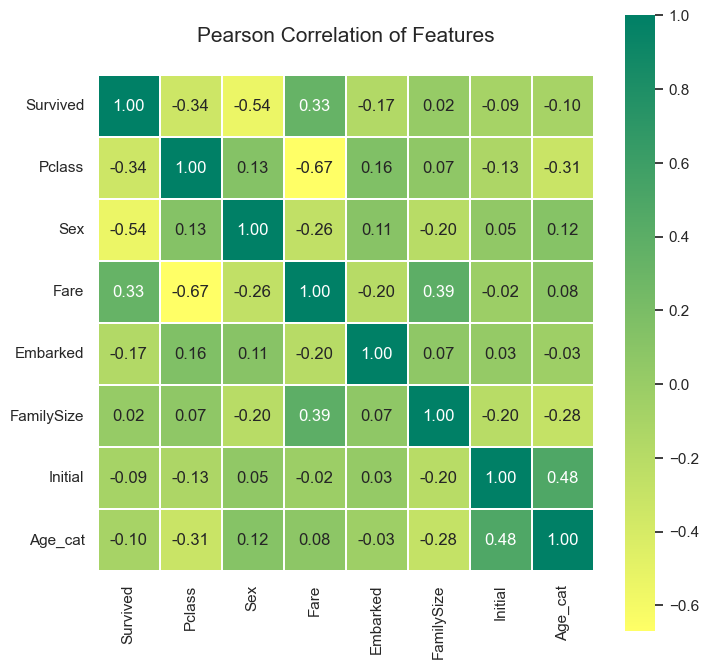

In [135]:
colormap = plt.cm.summer_r
plt.figure(figsize=(8, 8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 12}, fmt='.2f')

In [136]:
heatmap_data.corr()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


# One-Hot Encoding

In [137]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [138]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False


In [139]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,1,3,False,False,True,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,2,4,False,False,False,True,False
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,1,6,False,False,True,False,False
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,2,2,False,False,True,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,2,2,False,False,False,True,False


In [140]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [141]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,False,False,True,False,False,False,False,True


In [142]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,NaN,3,False,False,True,False,False,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,NaN,4,False,False,False,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,NaN,6,False,False,True,False,False,False,True,False
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,NaN,2,False,False,True,False,False,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,NaN,2,False,False,False,True,False,False,False,True


# Removing unnecessary columns

In [143]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [144]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


In [145]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,3,False,False,True,False,False,False,True,False
1,3,0,7.0000,4,False,False,False,True,False,False,False,True
2,2,1,9.6875,6,False,False,True,False,False,False,True,False
3,3,1,8.6625,2,False,False,True,False,False,False,False,True
4,3,0,12.2875,2,False,False,False,True,False,False,False,True


# ML Modeling

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [147]:
X_train = df_train.drop('Survived', axis=1).values
targe_label = df_train['Survived'].values
X_test = df_test.values

In [148]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, targe_label, test_size=0.3, random_state=2018)

In [149]:
X_tr.shape

(623, 13)

In [150]:
y_tr.shape

(623,)

In [151]:
X_vld.shape

(268, 13)

In [152]:
y_vld.shape

(268,)

In [153]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [154]:
prediction = model.predict(X_vld)

In [155]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [156]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


In [157]:
(prediction == y_vld).sum() / prediction.shape[0] * 100

82.83582089552239

In [158]:
model.feature_importances_

array([0.10702056, 0.10651108, 0.3198875 , 0.08702238, 0.11859741,
       0.01531758, 0.03246785, 0.13882812, 0.02417019, 0.00609803,
       0.0124897 , 0.01144339, 0.02014623])

In [159]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


In [160]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,3,False,False,True,False,False,False,True,False
1,3,0,7.0000,4,False,False,False,True,False,False,False,True
2,2,1,9.6875,6,False,False,True,False,False,False,True,False
3,3,1,8.6625,2,False,False,True,False,False,False,False,True
4,3,0,12.2875,2,False,False,False,True,False,False,False,True


In [161]:
import pandas as pd
from pandas import Series

feature_importances = model.feature_importances_
df_X_tr = pd.DataFrame(X_tr, columns=df_train.drop('Survived', axis=1).columns)
Series_feat_imp = Series(feature_importances, index=df_X_tr.columns)


In [162]:
df_test.columns

Index(['Pclass', 'Sex', 'Fare', 'Age_cat', 'Initial_0', 'Initial_1',
       'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1',
       'Embarked_2'],
      dtype='object')

In [163]:
Series_feat_imp.sort_values(ascending=True)

Initial_4     0.006098
Embarked_1    0.011443
Embarked_0    0.012490
Initial_0     0.015318
Embarked_2    0.020146
Initial_3     0.024170
Initial_1     0.032468
FamilySize    0.087022
Sex           0.106511
Pclass        0.107021
Age_cat       0.118597
Initial_2     0.138828
Fare          0.319887
dtype: float64

<Axes: >

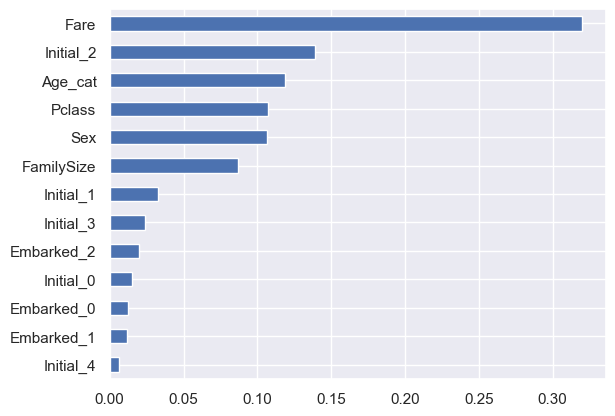

In [164]:
Series_feat_imp.sort_values(ascending=True).plot.barh()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

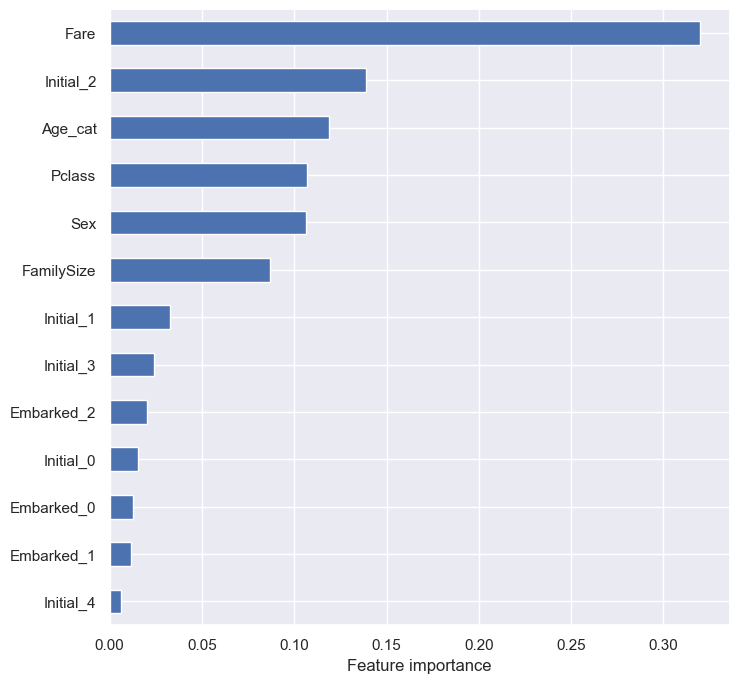

In [165]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylable('Feature')
plt.show()

In [ ]:
prediction = model.predict(X_test)